In [8]:
from gensim.models import Word2Vec
import numpy as np 
import pandas as pd
from sklearn import cluster
from sklearn import metrics
from nltk.cluster import KMeansClusterer
import nltk

data = pd.read_csv('allData.csv')
data.dropna()
data = data['article']       
data = pd.DataFrame(data)
data_nan=data.dropna() 

In [9]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[array([-0.00070641,  0.00017864, -0.00092738, -0.00001717,  0.00013719,
       -0.000428  , -0.00090104, -0.00139008, -0.00015293, -0.00011166,
        0.00117069, -0.00070125, -0.00149555, -0.00075044, -0.00036157,
       -0.00185481,  0.00050731, -0.00019548,  0.00043155, -0.00007798,
       -0.00011566,  0.00005407, -0.0005579 , -0.00133095,  0.00025324,
       -0.00142543,  0.00074455, -0.00082779, -0.000365  ,  0.0020788 ,
       -0.00104372, -0.00067553, -0.00086108, -0.0012517 ,  0.0002671 ,
        0.00045467,  0.00020154, -0.00017323, -0.00054413,  0.00094373,
       -0.00000307,  0.00038924,  0.00063322, -0.0007972 , -0.00003074,
       -0.00055948,  0.00126722, -0.00005382,  0.00008058, -0.00059482,
        0.00075911,  0.00146945, -0.00026941,  0.00001912,  0.0002698 ,
        0.00052001, -0.00032562,  0.00046282,  0.00046482,  0.00099333,
       -0.00030037,  0.00058853, -0.0012404 ,  0.00189482, -0.00103034,
       -0.00074501, -0.000279  ,  0.00040874,  0.00034973, -0.0

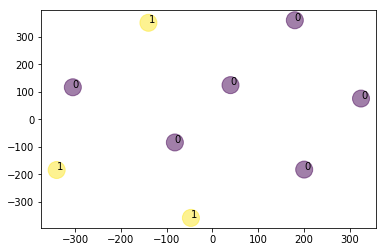

In [10]:
# training data for the main example 
  
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]
   
model = Word2Vec(sentences, min_count=1)

X=[]

for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
    
print(X)
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
 
print (model.similarity('post', 'book'))
print (model.most_similar(positive=['machine'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
for j in range(len(sentences)):    
    plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
    print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()

In [11]:
#funcion for cleaning articles 
def clean_text(text):

    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('french'))
    words = [w for w in words if not w in stop_words]
    return words

In [23]:
from nltk.tokenize import sent_tokenize
#sentence where each word is tokenized
#s is all articles 
s = []
for raw in data_nan['article']:
    if len(raw) > 0:
        s.append(clean_text(raw))
        
s[0:2]

[['mosaïque',
  'fm',
  'a',
  'appris',
  'président',
  'parlement',
  'mohamed',
  'naceur',
  'a',
  'interrompu',
  'congé',
  'maladie',
  'afin',
  'rendre',
  'lassemblée',
  'représentants',
  'peuple',
  'sen',
  'effet',
  'absenté',
  'depuis',
  'quelques',
  'jours',
  'raison',
  'dun',
  'malaise',
  'attendu',
  'mohamed',
  'naceur',
  'préside',
  'réunion',
  'présidents',
  'blocs',
  'parlementaires'],
 ['mosaïque',
  'fm',
  'a',
  'appris',
  'présidents',
  'blocs',
  'parlementaires',
  'affirmé',
  'lunanimité',
  'quil',
  'aucune',
  'vacance',
  'officielle',
  'niveau',
  'présidence',
  'république',
  'mohamed',
  'naceur',
  'a',
  'sens',
  'souhaité',
  'prompt',
  'rétablissement',
  'caid',
  'essebsi',
  'a',
  'victime',
  'dun',
  'deuxième',
  'malaise',
  'qualifié',
  'daigu',
  'tout',
  'coeur',
  'monsieur',
  'président',
  'sestil',
  'exprimé']]

In [24]:
# training data for our example
#problem of dimension baliz mokhtar choufou hhh   
our_model = Word2Vec(s, min_count=1)

Y=[]

for sentence in s:
    Y.append(sent_vectorizer(sentence, our_model))   
    
print(Y[0:2])
 
# note with some version you would need use this (without wv) 
 
print (our_model[our_model.wv.vocab])
 
print (our_model.similarity('rached', 'ennahdha'))
print (our_model.most_similar(positive=['nidaa'], negative=[], topn=2))
  
NUM_CLUSTERS=2
our_kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = our_kclusterer.cluster(Y, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(s):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(Y)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y_new=model.fit_transform(Y)
 
plt.scatter(Y_new[:, 0], Y_new[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
for j in range(len(s)):    
    plt.annotate(assigned_clusters[j],xy=(Y_new[j][0], Y_new[j][1]),xytext=(0,0),textcoords='offset points')
    print ("%s %s" % (assigned_clusters[j],  s[j]))
 
 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[array([ 0.21318828, -0.27120575,  0.07081363, -0.8133422 , -0.17426902,
        0.17419875,  0.5767239 , -0.59054077, -0.44254047, -0.05192087,
        0.47197595, -0.39125937, -0.20640479,  0.41707313,  0.7083071 ,
       -0.14767256, -0.06593943, -0.246654  , -0.6536178 ,  0.62510115,
       -0.08140337,  0.3816649 , -0.3762334 ,  0.0852397 ,  0.04966421,
       -0.18305893,  0.21948676,  0.05410746, -0.25600308, -0.41431537,
        0.42578104, -0.4751965 ,  0.32696795, -0.6590798 , -0.5575588 ,
        0.21212357, -0.17412484,  0.3870328 , -1.2106833 , -0.12542129,
       -0.14456655, -0.5210995 , -0.24952625, -0.446594  ,  0.43959197,
        0.7260912 ,  0.23475619,  0.46851388, -0.39437833,  0.731497  ,
        0.48438245, -0.76480407,  0.07975624,  0.2514869 , -0.33049527,
       -0.15545699,  0.14809215, -0.04671999,  0.78545946, -0.356018  ,
       -0.22552772,  0.12599395, -0.09718203, -0.14355524,  0.13424213,
        0.23880981,  0.08989615, -0.01760753,  0.06842598,  0.1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


ValueError: shapes (0,) and (100,) not aligned: 0 (dim 0) != 100 (dim 0)